In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/InfoViz/Project/

/content/drive/MyDrive/InfoViz/Project


In [3]:
import pandas as pd
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Replace 'path_to_file' with the actual file path
df = pd.read_csv('movie_metadata.csv')

# Display the first few rows
print(df.head())
print(df.columns)

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

In [4]:
import pandas as pd

# Replace 'path_to_file' with the actual file path
df = pd.read_csv('movie_metadata.csv')

# Display the first few rows to understand the structure
print("First few rows of the dataset:")
print(df.head())

# Display the summary of the dataset
print("\nSummary of the dataset:")
print(df.info())

# Display basic statistics of the numerical columns
print("\nBasic statistics (numerical columns):")
print(df.describe())

# Display the number of missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)

First few rows of the dataset:
   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|

In [5]:
total_rows = len(df)
print(f"Total number of rows in the dataset: {total_rows}")

# Alternatively, using the shape attribute (first element is the number of rows)
total_columns_shape = df.shape[1]
print(f"Total number of columns (using shape): {total_columns_shape}")

Total number of rows in the dataset: 5043
Total number of columns (using shape): 28


In [6]:
import pandas as pd
import plotly.express as px

# Replace 'path_to_file' with the actual file path
df = pd.read_csv('movie_metadata.csv')

# Get the number of missing values in each column
missing_data = df.isnull().sum()

# Filter out columns with no missing values
missing_data = missing_data[missing_data > 0]

# Create a bar plot using Plotly
fig = px.bar(
    x=missing_data.index,               # Columns with missing values
    y=missing_data.values,              # Count of missing values in each column
    labels={'x': 'Columns', 'y': 'Number of Missing Values'},
    title='Missing Values per Column',
    color=missing_data.values,          # Color by missing values count
    color_continuous_scale='Oranges',   # Set color scale
)

# Customize layout for a nicer look with a white background and bold text
fig.update_layout(
    xaxis_title='Columns',
    yaxis_title='Number of Missing Values',
    xaxis_tickangle=-45,                # Rotate x-axis labels for readability
    template='plotly_white',            # White background template
    plot_bgcolor='white',               # Set the plot's background color to white
    title_x=0.5,                        # Center the title
    title_font=dict(
        size=20,                        # Increase title font size
        family='Arial',                  # Change font family (optional)
        color='black',                  # Set the title color (optional)
        weight='bold'                   # Make the title bold
    ),
    xaxis_title_font=dict(
        size=16,                        # Increase x-axis title font size
        family='Arial',                  # Set font family (optional)
        weight='bold'                   # Make x-axis title bold
    ),
    yaxis_title_font=dict(
        size=16,                        # Increase y-axis title font size
        family='Arial',                  # Set font family (optional)
        weight='bold'                   # Make y-axis title bold
    ),
    font=dict(
        size=14,                        # Increase font size for axis ticks
        family='Arial',                  # Set font family (optional)
        weight='bold'                   # Make tick labels bold
    )
)

# Show the plot
fig.show()


# **Design Task 1:**

**Domain Problem:** Users need to understand the global distribution of movie revenues.

**Task:** Show how movies perform in different countries and identify regions with high or
low revenue.

**Design Component:** A map visualization displaying budget and revenue by country helps
users identify regional differences in movie performance.


In [7]:
import pandas as pd
import plotly.express as px

# Load the CSV file
df = pd.read_csv('movie_metadata.csv')

# Filter and clean data: remove rows with missing 'gross', 'budget', or 'country'
df = df[['country', 'gross', 'budget']]

# Convert 'gross' and 'budget' to numeric values if needed
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# Aggregate by country: sum of gross and budget
country_data = df.groupby('country').sum().reset_index()

# Identify the highest and lowest revenue countries
max_revenue_country = country_data.loc[country_data['gross'].idxmax()]
min_revenue_country = country_data.loc[country_data['gross'].idxmin()]

# Create a choropleth map for gross revenue with budget as hover information
fig = px.choropleth(
    country_data,
    locations="country",  # Column with country names
    locationmode="country names",  # Match locations with country names
    color="gross",  # Data for coloring
    color_continuous_scale="RdYlGn",  # Red to Yellow to Green scale
    labels={'gross': 'Total Revenue (Gross)'},
    hover_data={'budget': True, 'gross': ':,.0f'}  # Show budget and formatted gross in hover
)

# Update layout: bold, centered title
fig.update_layout(
    title={
        'text': "Global Distribution of Movie Revenue",
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20, 'family': 'Arial', 'color': 'black', 'weight': 'bold'} # Change 'bold' to 'weight': 'bold'
    },
)
# Add annotations for highest and lowest revenue countries
fig.add_annotation(
    text=f"Highest Revenue: {max_revenue_country['country']} ({max_revenue_country['gross']:,.0f})",
    xref="paper", yref="paper",
    x=0.5, y=0,  # Position annotation above the map
    showarrow=False,
    font=dict(size=14, color="green")
)

fig.add_annotation(
    text=f"Lowest Revenue: {min_revenue_country['country']} ({min_revenue_country['gross']:,.0f})",
    xref="paper", yref="paper",
    x=0.5, y=-0.05,  # Position annotation slightly below the first one
    showarrow=False,
    font=dict(size=14, color="red")
)

# Show the map
fig.show()



# **Design Task 2:**

**Domain Problem:** Users need to understand the global distribution of movie revenues by
year.

**Task:** Show how movie performance varies by country and region each year.

**Design Component:** A map visualization with an animated year selector that allows users
to view budget and revenue by country, emphasizing global performance trends across
different years.


In [8]:
import pandas as pd
import plotly.express as px

# Load the CSV file
df = pd.read_csv('movie_metadata.csv')

# Filter and clean data: Keep rows with valid 'gross', 'budget', 'country', and 'title_year'
df = df[['country', 'gross', 'budget', 'title_year']]

# Convert to numeric values where necessary
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['title_year'] = pd.to_numeric(df['title_year'], errors='coerce')

# Aggregate by country and year: sum of gross and budget
country_year_data = df.groupby(['country', 'title_year']).sum().reset_index()

# Sort the data by 'title_year' to ensure the animation goes from low to high year
country_year_data = country_year_data.sort_values(by="title_year")

# Create the choropleth map with animation
fig = px.choropleth(
    country_year_data,
    locations="country",  # Column with country names
    locationmode="country names",  # Match locations with country names
    color="gross",  # Data for coloring
    animation_frame="title_year",  # Animate by year
    color_continuous_scale="RdYlGn",  # Red to Yellow to Green scale
    labels={'gross': 'Total Revenue (Gross)', 'title_year': 'Year'},
    hover_data={'title_year': True, 'budget': True, 'gross': ':,.0f'}  # Static hover data for now
)

# Function to create dynamic annotations for each year (minimum and maximum revenue)
def get_year_annotations(year_data, year):
    max_revenue = year_data.loc[year_data['gross'].idxmax()]
    min_revenue = year_data.loc[year_data['gross'].idxmin()]

    # Create annotations for the year
    annotations = [
        dict(
            xref="paper", yref="paper",
            x=0.5, y=-0.05,
            text=f"Highest Revenue ({year}): {max_revenue['country']} ({max_revenue['gross']:,.0f})",
            showarrow=False,
            font=dict(size=14, color="green"),
            visible=True
        ),
        dict(
            xref="paper", yref="paper",
            x=0.5, y=-0.1,
            text=f"Lowest Revenue ({year}): {min_revenue['country']} ({min_revenue['gross']:,.0f})",
            showarrow=False,
            font=dict(size=14, color="red"),
            visible=True
        )
    ]
    return annotations

# Add dynamic annotations for each year (minimum and maximum revenue)
frames = []

for year in sorted(country_year_data['title_year'].unique()):
    # Filter data for the specific year
    year_data = country_year_data[country_year_data['title_year'] == year]

    # Create the frame with year data and annotations
    frames.append(
        dict(
            data=[dict(type='choropleth', locations=year_data['country'], z=year_data['gross'])],
            layout=dict(
                annotations=get_year_annotations(year_data, year),
                title=f"Global Distribution of Movie Revenue Year: {year}",  # Update title with year
                hovermode='closest',
                geo=dict(showcoastlines=True, coastlinecolor="Black")
            ),
            name=str(year)  # This ensures we keep track of each frame by year
        )
    )

# Add frames to the figure
fig.frames = frames

# Update layout for animation controls and annotations
fig.update_layout(
    title={  # Default title, will be updated with each frame
        'text': "Global Distribution of Movie Revenue Over Time",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20, 'family': 'Arial', 'color': 'black'}
    },
    updatemenus=[{
        'type': 'buttons',
        'buttons': [
            {
                'label': 'Play',
                'method': 'animate',
                'args': [None, {
                    'frame': {'duration': 1000, 'redraw': True},
                    'fromcurrent': True  # Starts animation from the current frame if clicked
                }]
            },
            {
                'label': 'Pause',
                'method': 'animate',
                'args': [[None], {
                    'frame': {'duration': 0, 'redraw': False},  # Pause animation
                    'mode': 'immediate',
                    'transition': {'duration': 0}
                }]
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Show the map with the animation
fig.show()


# **Design Task 3:**

**Domain Problem:** Users want to compare IMDb scores of movies across countries.

**Task:** Allow users to compare movie ratings by country.

**Design Component:** A box plot compares IMDb scores by country, enabling users to
analyze regional rating differences.

In [9]:
import pandas as pd
import plotly.express as px

# Load the CSV file
df = pd.read_csv('movie_metadata.csv')

# Filter and clean data: Keep rows with valid 'imdb_score' and 'country'
df = df[['country', 'imdb_score']].dropna()

# Ensure 'imdb_score' is numeric
df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')

# Sort the countries alphabetically
sorted_countries = sorted(df['country'].dropna().unique())

# Create the box plot comparing IMDb scores by country
fig = px.box(
    df,
    x="country",  # Country on the x-axis
    y="imdb_score",  # IMDb score on the y-axis
    title="IMDb Scores by Country",  # Title of the plot
    labels={'imdb_score': 'IMDb Score', 'country': 'Country'},  # Axis labels
    color="country",  # Color by country (optional for better distinction)
    category_orders={"country": sorted_countries},  # Sort countries alphabetically
    notched=True  # Adds a notch to the box plot for better visualization
)

# Update layout for better presentation
fig.update_layout(
    title={
        'text': "IMDb Scores by Country",
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20, 'family': 'Arial', 'color': 'black'}
    },
    xaxis_title="Country",  # X-axis title
    yaxis_title="IMDb Score",  # Y-axis title
    showlegend=False,  # Hide the legend (as it's not necessary for box plot)
    xaxis=dict(
        tickangle=270  # Rotate the x-axis labels to be vertical (parallel to the y-axis)
    )
)

# Show the plot
fig.show()


# **Design Task 4:**
Domain Problem: Users need to compare IMDb scores across different genres.

Task: Allow users to compare ratings based on genre.

Design Component: A bar charts displaying IMDb scores across genres, helping users quickly assess genre-based rating differences.

In [10]:
import pandas as pd
import plotly.express as px

# Load the dataset
data = pd.read_csv('movie_metadata.csv')

# Clean and preprocess
data['genres'] = data['genres'].fillna('Unknown').str.split('|')
data = data.explode('genres')
data = data.dropna(subset=['imdb_score'])

# Calculate average IMDb scores for each genre
genre_avg_scores = data.groupby('genres')['imdb_score'].mean().reset_index()

# Sort genres by average IMDb scores
genre_avg_scores = genre_avg_scores.sort_values(by='imdb_score', ascending=False)

# Create a bar chart
fig = px.bar(
    genre_avg_scores,
    x='genres',
    y='imdb_score',
    title='Average IMDb Scores Across Genres',
    labels={'genres': 'Genre', 'imdb_score': 'Average IMDb Score'},
    text='imdb_score'
)

# Customize the chart
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='Genre',
    yaxis_title='Average IMDb Score',
    xaxis=dict(tickangle=45),
    showlegend=False
)

fig.show()

# **Design Task 5:**
Domain Problem: Users want to see IMDb score trends over time.

Task: Track and visualize changes in IMDb scores over time.

Design Component: Line graphs show IMDb score trends, allowing users to identify patterns in ratings over time.

In [11]:
import pandas as pd
import plotly.express as px

# Load and clean the dataset
data = pd.read_csv('movie_metadata.csv')
data = data.dropna(subset=['imdb_score', 'title_year', 'genres'])

# Split genres and expand the DataFrame
data['genres'] = data['genres'].str.split('|')
expanded_data = data.explode('genres')

# Calculate the average IMDb score by year and genre
trend_data = expanded_data.groupby(['title_year', 'genres'])['imdb_score'].mean().reset_index()
trend_data = trend_data.rename(columns={'title_year': 'Year', 'genres': 'Genre', 'imdb_score': 'Average IMDb Score'})

# Create the line chart
fig = px.line(
    trend_data,
    x='Year',
    y='Average IMDb Score',
    color='Genre',
    title='IMDb Score Trends Over Time by Genre',
    labels={'Year': 'Year', 'Average IMDb Score': 'Average IMDb Score', 'Genre': 'Genre'},
    template='plotly_white'
)

# Add the dropdown for filtering genres
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {"label": "All Genres", "method": "update", "args": [{"visible": [True] * len(trend_data['Genre'].unique())}]},
            ] + [
                {"label": genre, "method": "update", "args": [{"visible": [g == genre for g in trend_data['Genre'].unique()]}]}
                for genre in trend_data['Genre'].unique()
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)

fig.show()


# **Design Task 6:**
Domain Problem: Users want to explore relationships between budgets, genres, and movie success

Task: Analyze how factors like budget and genre influence movie success.

Design Component: A combination of map visualizations for budget and revenue and bar charts for genre-based IMDb scores allows users to explore correlations.

In [12]:
import pandas as pd
import plotly.express as px

# Load dataset
data = pd.read_csv('movie_metadata.csv')

#  preprocess data
data = data.dropna(subset=['budget', 'gross', 'genres'])
data['genres'] = data['genres'].str.split('|')
data = data.explode('genres')

# Aggregate by genre for budget and revenue
genre_data = data.groupby('genres')[['budget', 'gross', 'imdb_score']].mean().reset_index()

# Create a map for budget and gross revenue
country_data = data.groupby('country')[['budget', 'gross']].mean().reset_index()

fig1 = px.choropleth(
    country_data,
    locations="country",  # Match with country names
    locationmode="country names",
    color="gross",
    hover_data=['budget'],
    color_continuous_scale="Viridis",
    title="Global Distribution of Movie Revenue and Budget"
)

#  Bar chart for IMDb scores by genre
fig2 = px.bar(
    genre_data,
    x='genres',
    y='imdb_score',
    color='imdb_score',
    title='Average IMDb Scores Across Genres',
    labels={'genres': 'Genre', 'imdb_score': 'Average IMDb Score'},
    text='imdb_score'
)

# update bar chart
fig2.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig2.update_layout(
    xaxis_title='Genre',
    yaxis_title='Average IMDb Score',
    xaxis=dict(tickangle=45),
    showlegend=False
)

# Show both visualizations
fig1.show()
fig2.show()

# **Design Task 7:**
Domain Problem: Users want to explore the impact of language on genre popularity.

Task: Show how languages are distributed between genres and identify associations.

Design Component: A pie chart displays the distribution of genres by language, helping users identify patterns between language and genre popularity.

In [13]:
# Load the dataset
data = pd.read_csv('movie_metadata.csv')

# Preprocess data
data = data.dropna(subset=['language', 'genres'])
data['genres'] = data['genres'].str.split('|')
data = data.explode('genres')

# Aggregate data by language and genre
language_genre_data = data.groupby(['language', 'genres']).size().reset_index(name='count')

# Create a pie chart for language distribution in genres
fig = px.sunburst(
    language_genre_data,
    path=['language', 'genres'],
    values='count',
    title="Distribution of Genres by Language",
    color='count',
    color_continuous_scale="RdBu"
)

# Show the pie chart
fig.show()


# **Design Task 8:**

**Domain Problem:** Users want to understand the relationships between IMDb scores, critic reviews, and actor likes.

**Task:** Allow users to analyze correlations between IMDb scores, number of critic reviews, and actor likes.

**Design Component:** A correlation heatmap visualizes the strength and direction of relationships between IMDb scores, critic reviews, and actor likes, helping users identify patterns and correlations among these variables.

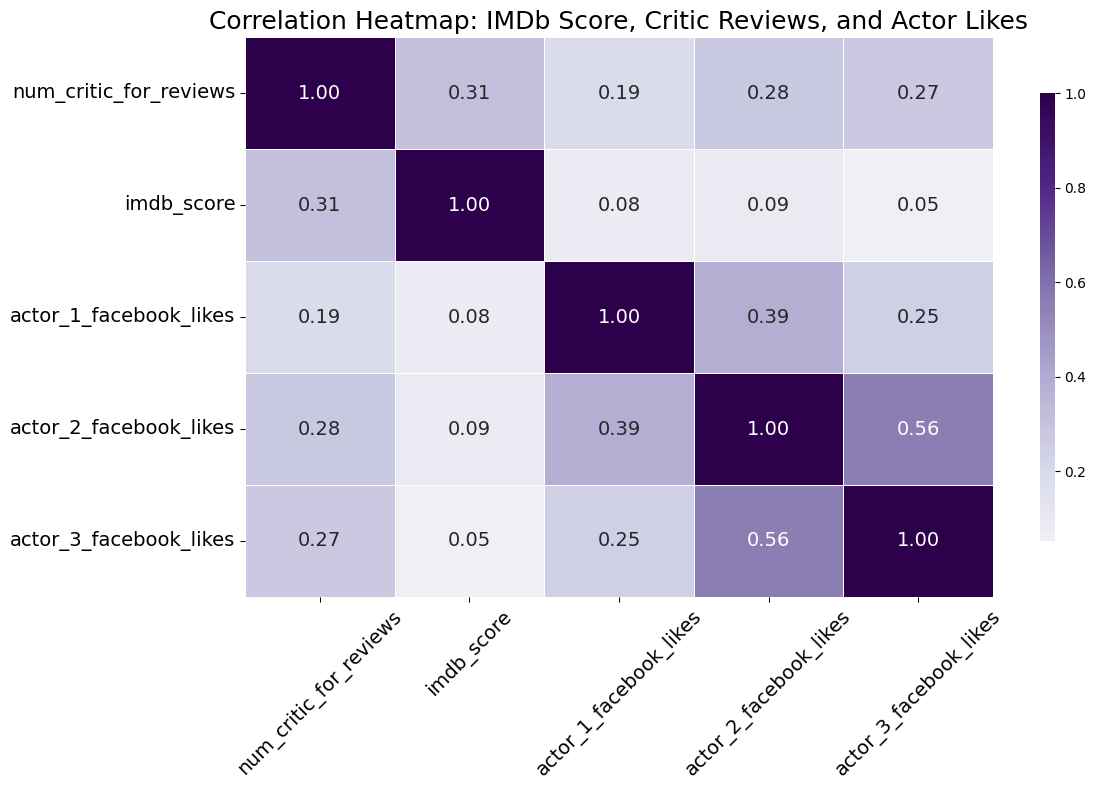

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('movie_metadata.csv')

# Select relevant columns
columns_of_interest = [
    'num_critic_for_reviews', 'imdb_score',
    'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes'
]
data = df[columns_of_interest]

# Drop rows with missing values
data = data.dropna()

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="PuOr",  # Purple-Orange diverging colormap
    fmt=".2f",
    linewidths=0.5,
    center=0,  # Center at 0 for diverging effect
    annot_kws={"size": 14},  # Increase annotation text size
    cbar_kws={"shrink": 0.8, "aspect": 30}  # Customize colorbar
)

# Customize the heatmap
plt.title("Correlation Heatmap: IMDb Score, Critic Reviews, and Actor Likes", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

# Show the heatmap
plt.show()
